### defaillance client réseau mobile avec ANN

In [1]:
import pandas as pd
df = pd.read_csv('fidelite_client_mobile.csv')

In [2]:
df.head()

,NumLigne,Id_Client,Nom,Nbre_min_tel,Pays,Genre,Age,Anciennete,Nbre_sec_internet,Nbre_Produits,Promotion,Actif,Revenu_estime,Fidelite
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,NumLigne,Id_Client,Nom,Nbre_min_tel,Pays,Genre,Age,Anciennete,Nbre_sec_internet,Nbre_Produits,Promotion,Actif,Revenu_estime,Fidelite
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NumLigne           10000 non-null  int64  
 1   Id_Client          10000 non-null  int64  
 2   Nom                10000 non-null  object 
 3   Nbre_min_tel       10000 non-null  int64  
 4   Pays               10000 non-null  object 
 5   Genre              10000 non-null  object 
 6   Age                10000 non-null  int64  
 7   Anciennete         10000 non-null  int64  
 8   Nbre_sec_internet  10000 non-null  float64
 9   Nbre_Produits      10000 non-null  int64  
 10  Promotion          10000 non-null  int64  
 11  Actif              10000 non-null  int64  
 12  Revenu_estime      10000 non-null  float64
 13  Fidelite           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
# Quelles sont les colonnes catégorielles

df.select_dtypes(exclude=['int64', 'float']).columns

Index(['Nom', 'Pays', 'Genre'], dtype='object')

In [ ]:
# suppression variables sans signification pour le modele

In [4]:
df = df.drop('NumLigne', axis=1)

In [5]:
df = df.drop('Nom', axis=1)

In [6]:
df = df.drop('Id_Client', axis=1)

In [8]:
# dimensions du data frame
df.shape

(10000, 11)

In [10]:
# stats élémentaires
df.describe()

,Nbre_min_tel,Age,Anciennete,Nbre_sec_internet,Nbre_Produits,Promotion,Actif,Revenu_estime,Fidelite
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# répartition instances sur le label Fidelite
df['Fidelite'].value_counts()

0    7963
1    2037
Name: Fidelite, dtype: int64

In [7]:
df_final = df.copy()

In [ ]:
# Visu corrélation entre features

In [8]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
        
plot_corr(df_final)

No handles with labels found to put in legend.


In [9]:
df_final.corr()

,Nbre_min_tel,Age,Anciennete,Nbre_sec_internet,Nbre_Produits,Promotion,Actif,Revenu_estime,Fidelite
Nbre_min_tel,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Anciennete,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Nbre_sec_internet,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Nbre_Produits,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
Promotion,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Actif,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Revenu_estime,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Fidelite,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### préparation data frame pour algo

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nbre_min_tel       10000 non-null  int64  
 1   Pays               10000 non-null  object 
 2   Genre              10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Anciennete         10000 non-null  int64  
 5   Nbre_sec_internet  10000 non-null  float64
 6   Nbre_Produits      10000 non-null  int64  
 7   Promotion          10000 non-null  int64  
 8   Actif              10000 non-null  int64  
 9   Revenu_estime      10000 non-null  float64
 10  Fidelite           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
# Transformation variables catégorielles avec One Hot Encoding
categorial = ['Pays','Genre']
df_final = pd.get_dummies(df_final, columns=categorial, drop_first=True)
df_final.head()

,Nbre_min_tel,Age,Anciennete,Nbre_sec_internet,Nbre_Produits,Promotion,Actif,Revenu_estime,Fidelite,Pays_Germany,Pays_Spain,Genre_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
# Nombre de features en final

len(df_final.columns)

12

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nbre_min_tel       10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Anciennete         10000 non-null  int64  
 3   Nbre_sec_internet  10000 non-null  float64
 4   Nbre_Produits      10000 non-null  int64  
 5   Promotion          10000 non-null  int64  
 6   Actif              10000 non-null  int64  
 7   Revenu_estime      10000 non-null  float64
 8   Fidelite           10000 non-null  int64  
 9   Pays_Germany       10000 non-null  uint8  
 10  Pays_Spain         10000 non-null  uint8  
 11  Genre_Male         10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [12]:
from sklearn.model_selection import train_test_split

# Suppression du label Fidelite dans X et transformation en array avec values
X = df_final.drop(['Fidelite'],axis=1).values

# Label Fidelite dans y 
y = df_final['Fidelite'].values

In [13]:
# Split it train set et test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [14]:
# Normalisation des data indispensable avec les réseaux de neurones
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# fit transform sur le train set et transform uniquement sur test set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# transformation en data frame de X_train
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.997431,0.393605,-1.393142,0.870089,-0.909628,-1.559825,0.974051,0.030098,-0.571412,-0.574711,0.905579
1,1.668224,-0.655209,-0.010371,0.906395,0.811755,0.641097,-1.026640,-0.179449,-0.571412,-0.574711,0.905579
2,1.492786,-0.178475,-1.047449,1.006131,0.811755,0.641097,0.974051,1.713021,1.750052,-0.574711,0.905579
3,-0.024237,-0.178475,0.681015,-1.228867,0.811755,0.641097,-1.026640,1.635027,-0.571412,-0.574711,-1.104266
4,0.718795,-1.227290,1.718093,-0.394943,0.811755,0.641097,-1.026640,-0.938768,-0.571412,-0.574711,0.905579


In [16]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,2.713841e-16,-2.172706e-16,-2.286425e-16,-1.898374e-15,-6.217408e-16,1.035775e-15,4.662937e-17,-1.189878e-15,1.113490e-15,3.511160e-16,3.221867e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-3.099562e+00,-1.990064e+00,-1.738835e+00,-1.228867e+00,-9.096281e-01,-1.559825e+00,-1.026640e+00,-1.724681e+00,-5.714117e-01,-5.747109e-01,-1.104266e+00
25%,-6.950293e-01,-6.552093e-01,-1.047449e+00,-1.228867e+00,-9.096281e-01,-1.559825e+00,-1.026640e+00,-8.571067e-01,-5.714117e-01,-5.747109e-01,-1.104266e+00
50%,1.704255e-02,-1.784755e-01,-1.037078e-02,3.329936e-01,-9.096281e-01,6.410974e-01,9.740508e-01,-1.055705e-02,-5.714117e-01,-5.747109e-01,9.055787e-01
75%,6.981548e-01,4.889518e-01,1.026707e+00,8.183773e-01,8.117552e-01,6.410974e-01,9.740508e-01,8.559133e-01,-5.714117e-01,-5.747109e-01,9.055787e-01
max,2.060379e+00,4.684209e+00,1.718093e+00,2.596884e+00,4.254522e+00,6.410974e-01,9.740508e-01,1.734593e+00,1.750052e+00,1.740005e+00,9.055787e-01


In [17]:
# version de tensorflow utilisée
import tensorflow.keras
print(tensorflow.__version__)

2.0.0


### Réseau de neurones ANN

In [18]:
# import modules Keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# initialisation modèle
model = Sequential()
# premiere couche avec 22 neurones, et input_dim = 11, car 11 variables explicatives en entrée
model.add(Dense(22, kernel_initializer = "uniform", activation = "relu", input_dim=11))
# couche de sortie avec 1 neurone puisque classification binaire
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

# compilation modèle avec optimiser utilisé et metrique
model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [20]:
# Visu Model Summary avec ses paramètres
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 23        
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Training du modèle avec choix des hyperparamètres batch_size et epochs 
batch_size = 10
epochs = 300

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7000 samples, validate on 3000 samples
Epoch 1/300
7000/7000 [==============================] - 4s 636us/sample - loss: 0.4705 - accuracy: 0.8010 - val_loss: 0.4262 - val_accuracy: 0.8113
Epoch 2/300
7000/7000 [==============================] - 2s 344us/sample - loss: 0.4091 - accuracy: 0.8230 - val_loss: 0.4088 - val_accuracy: 0.8257
Epoch 3/300
7000/7000 [==============================] - 2s 284us/sample - loss: 0.3959 - accuracy: 0.8304 - val_loss: 0.3981 - val_accuracy: 0.8293
Epoch 4/300
7000/7000 [==============================] - 2s 244us/sample - loss: 0.3878 - accuracy: 0.8344 - val_loss: 0.3916 - val_accuracy: 0.8280
Epoch 5/300
7000/7000 [==============================] - 2s 297us/sample - loss: 0.3828 - accuracy: 0.8326 - val_loss: 0.3860 - val_accuracy: 0.8290
Epoch 6/300
7000/7000 [==============================] - 3s 480us/sample - loss: 0.3784 - accuracy: 0.8356 - val_loss: 0.3831 - val_accuracy: 0.8260
Epoch 7/300
7000/7000 [==============================] - 3

7000/7000 [==============================] - 2s 341us/sample - loss: 0.3419 - accuracy: 0.8624 - val_loss: 0.3492 - val_accuracy: 0.8557
Epoch 110/300
7000/7000 [==============================] - 2s 246us/sample - loss: 0.3419 - accuracy: 0.8609 - val_loss: 0.3435 - val_accuracy: 0.8557
Epoch 111/300
7000/7000 [==============================] - 4s 540us/sample - loss: 0.3423 - accuracy: 0.8593 - val_loss: 0.3465 - val_accuracy: 0.8610
Epoch 112/300
7000/7000 [==============================] - 4s 555us/sample - loss: 0.3420 - accuracy: 0.8639 - val_loss: 0.3482 - val_accuracy: 0.8543
Epoch 113/300
7000/7000 [==============================] - 2s 260us/sample - loss: 0.3419 - accuracy: 0.8637 - val_loss: 0.3428 - val_accuracy: 0.8610
Epoch 114/300
7000/7000 [==============================] - 2s 278us/sample - loss: 0.3423 - accuracy: 0.8634 - val_loss: 0.3451 - val_accuracy: 0.8597
Epoch 115/300
7000/7000 [==============================] - 2s 288us/sample - loss: 0.3418 - accuracy: 0.8600

7000/7000 [==============================] - 2s 270us/sample - loss: 0.3370 - accuracy: 0.8647 - val_loss: 0.3444 - val_accuracy: 0.8577
Epoch 218/300
7000/7000 [==============================] - 2s 256us/sample - loss: 0.3379 - accuracy: 0.8646 - val_loss: 0.3455 - val_accuracy: 0.8590
Epoch 219/300
7000/7000 [==============================] - 2s 254us/sample - loss: 0.3370 - accuracy: 0.8623 - val_loss: 0.3401 - val_accuracy: 0.8597
Epoch 220/300
7000/7000 [==============================] - 3s 371us/sample - loss: 0.3378 - accuracy: 0.8633 - val_loss: 0.3426 - val_accuracy: 0.8623
Epoch 221/300
7000/7000 [==============================] - 2s 348us/sample - loss: 0.3369 - accuracy: 0.8653 - val_loss: 0.3462 - val_accuracy: 0.8547
Epoch 222/300
7000/7000 [==============================] - 3s 457us/sample - loss: 0.3371 - accuracy: 0.8640 - val_loss: 0.3422 - val_accuracy: 0.8597
Epoch 223/300
7000/7000 [==============================] - 4s 541us/sample - loss: 0.3364 - accuracy: 0.8626

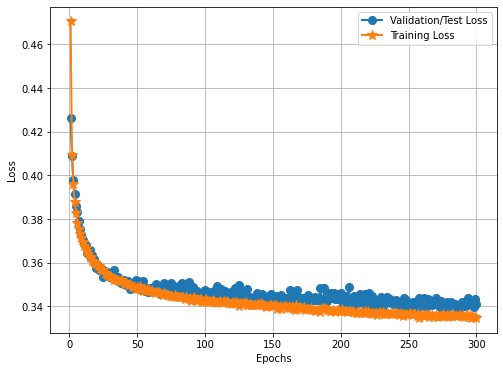

In [22]:
# Plot des loss 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

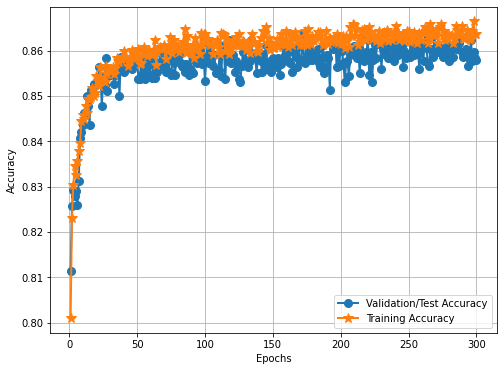

In [23]:
# VALABLE EN TENSORFLOW Version 2 uniquement 
# avec Tensorflow précédent utiliser acc et val_acc

# Plot de l'accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

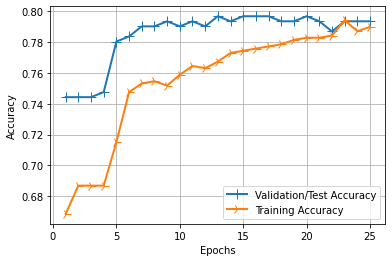

In [74]:
# Version avec TENSORFLOW 1.X et NON 2.X
# Plotting accuracy 
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# metriques : classification report et matrice de confusion

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [25]:
predictions = model.predict(X_test)
# seuil (proba) choisi à 0.5
predictions = (predictions > 0.5)
# matrice de confusion
print(confusion_matrix(y_test, predictions))

[[2257  111]
 [ 315  317]]


In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2368
           1       0.74      0.50      0.60       632

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [32]:
# modèle avec couches cachées (deep learning) 
# et drop out pour réduite l'overfitting : désactivation aléatoire d'un % de neurones

In [27]:
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [28]:
# Normalisation data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# modèle avec couches cachées (deep learning) 
# et drop out pour réduite l'overfitting : désactivation aléatoire d'un % de neurones

In [29]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
# couches avec nbre de neurones 22, puis 11 puis 11
# ajout Dropout après chaque couche Dense
# Couche d'entrée
model2.add(Dense(22, activation='relu', input_dim=11))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(11, activation='relu'))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(11, activation = 'relu'))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 22)                264       
_________________________________________________________________
dropout (Dropout)            (None, 22)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 11)                253       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dropout_2 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [31]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# training du modèle
batch_size = 10
epochs = 300

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7000 samples, validate on 3000 samples
Epoch 1/300
7000/7000 [==============================] - 2s 267us/sample - loss: 0.5291 - accuracy: 0.7670 - val_loss: 0.4706 - val_accuracy: 0.7893
Epoch 2/300
7000/7000 [==============================] - 1s 163us/sample - loss: 0.4744 - accuracy: 0.8020 - val_loss: 0.4516 - val_accuracy: 0.7927
Epoch 3/300
7000/7000 [==============================] - 1s 167us/sample - loss: 0.4556 - accuracy: 0.8043 - val_loss: 0.4387 - val_accuracy: 0.7977
Epoch 4/300
7000/7000 [==============================] - 1s 166us/sample - loss: 0.4480 - accuracy: 0.8071 - val_loss: 0.4318 - val_accuracy: 0.8063
Epoch 5/300
7000/7000 [==============================] - 1s 201us/sample - loss: 0.4380 - accuracy: 0.8130 - val_loss: 0.4250 - val_accuracy: 0.8180
Epoch 6/300
7000/7000 [==============================] - 1s 157us/sample - loss: 0.4386 - accuracy: 0.8093 - val_loss: 0.4199 - val_accuracy: 0.8127
Epoch 7/300
7000/7000 [==============================] - 1

7000/7000 [==============================] - 1s 184us/sample - loss: 0.3519 - accuracy: 0.8606 - val_loss: 0.3392 - val_accuracy: 0.8617
Epoch 110/300
7000/7000 [==============================] - 1s 191us/sample - loss: 0.3571 - accuracy: 0.8537 - val_loss: 0.3408 - val_accuracy: 0.8567
Epoch 111/300
7000/7000 [==============================] - 1s 202us/sample - loss: 0.3507 - accuracy: 0.8579 - val_loss: 0.3398 - val_accuracy: 0.8600
Epoch 112/300
7000/7000 [==============================] - 1s 182us/sample - loss: 0.3554 - accuracy: 0.8559 - val_loss: 0.3395 - val_accuracy: 0.8587
Epoch 113/300
7000/7000 [==============================] - 1s 167us/sample - loss: 0.3535 - accuracy: 0.8551 - val_loss: 0.3375 - val_accuracy: 0.8650
Epoch 114/300
7000/7000 [==============================] - 1s 164us/sample - loss: 0.3561 - accuracy: 0.8556 - val_loss: 0.3376 - val_accuracy: 0.8620
Epoch 115/300
7000/7000 [==============================] - 1s 168us/sample - loss: 0.3562 - accuracy: 0.8553

7000/7000 [==============================] - 1s 169us/sample - loss: 0.3473 - accuracy: 0.8600 - val_loss: 0.3376 - val_accuracy: 0.8663
Epoch 218/300
7000/7000 [==============================] - 1s 194us/sample - loss: 0.3488 - accuracy: 0.8633 - val_loss: 0.3371 - val_accuracy: 0.8633
Epoch 219/300
7000/7000 [==============================] - 1s 170us/sample - loss: 0.3553 - accuracy: 0.8594 - val_loss: 0.3360 - val_accuracy: 0.8620
Epoch 220/300
7000/7000 [==============================] - 1s 170us/sample - loss: 0.3499 - accuracy: 0.8591 - val_loss: 0.3366 - val_accuracy: 0.8667
Epoch 221/300
7000/7000 [==============================] - 1s 191us/sample - loss: 0.3511 - accuracy: 0.8624 - val_loss: 0.3382 - val_accuracy: 0.8603
Epoch 222/300
7000/7000 [==============================] - 1s 182us/sample - loss: 0.3478 - accuracy: 0.8640 - val_loss: 0.3384 - val_accuracy: 0.8593
Epoch 223/300
7000/7000 [==============================] - 1s 188us/sample - loss: 0.3497 - accuracy: 0.8590

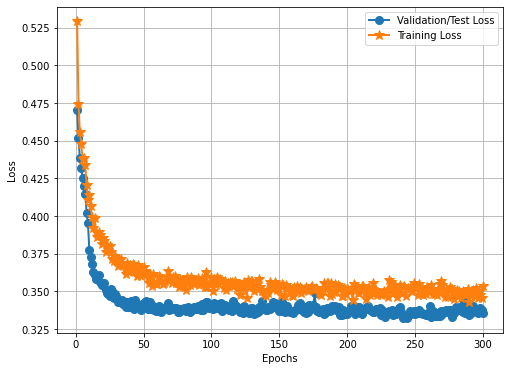

In [33]:
# Plot des loss 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
# prédictions sur X_test et metriques
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))


[[2285   83]
 [ 322  310]]


In [126]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2368
           1       0.77      0.47      0.59       632

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [35]:
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [36]:
# Normalisation data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### avec early stopping

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
# monitor : mesure à controler, ici, la loss qu'on doit écrire val_loss
# patience : nombre d'epochs après lequel le modèle s'arrete si il n'y a pas d'amélioration de la loss
# on n'arrete pas brutalement, car phénomène de bruit
# mode : min car on veut minimiser la variable que l'on monitore, ici la loss
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [42]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
# couches avec nbre de neurones 22, puis 11 puis 11
# ajout Dropout après chaque couche Dense
# Couche d'entrée
model2.add(Dense(22, activation='relu', input_dim=11))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(11, activation='relu'))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(11, activation = 'relu'))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 22)                264       
_________________________________________________________________
dropout_6 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 11)                253       
_________________________________________________________________
dropout_7 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 11)                132       
_________________________________________________________________
dropout_8 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [43]:
# # on ajoute le callbacks au niveau du fit du modèle
batch_size = 10
epochs = 300

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    callbacks=[early_stop], 
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7000 samples, validate on 3000 samples
Epoch 1/300
7000/7000 [==============================] - 2s 276us/sample - loss: 0.5328 - accuracy: 0.7821 - val_loss: 0.4761 - val_accuracy: 0.7893
Epoch 2/300
7000/7000 [==============================] - 1s 157us/sample - loss: 0.4808 - accuracy: 0.7986 - val_loss: 0.4585 - val_accuracy: 0.7893
Epoch 3/300
7000/7000 [==============================] - 1s 160us/sample - loss: 0.4567 - accuracy: 0.7993 - val_loss: 0.4471 - val_accuracy: 0.7893
Epoch 4/300
7000/7000 [==============================] - 1s 186us/sample - loss: 0.4604 - accuracy: 0.7993 - val_loss: 0.4439 - val_accuracy: 0.7893
Epoch 5/300
7000/7000 [==============================] - 1s 173us/sample - loss: 0.4484 - accuracy: 0.7993 - val_loss: 0.4366 - val_accuracy: 0.7893
Epoch 6/300
7000/7000 [==============================] - 1s 158us/sample - loss: 0.4435 - accuracy: 0.7993 - val_loss: 0.4304 - val_accuracy: 0.7893
Epoch 7/300
7000/7000 [==============================] - 1

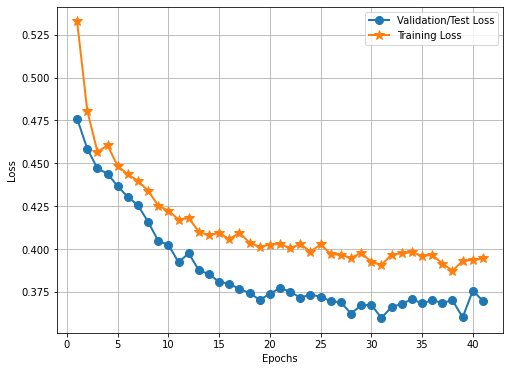

In [44]:
# Plot des loss 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [45]:
# prédictions sur X_test et metriques
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))

[[2274   94]
 [ 329  303]]


In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2368
           1       0.76      0.48      0.59       632

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [47]:
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [48]:
# Normalisation data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### avec régularisation

In [49]:

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model3 = Sequential()
# 3 couches cachées avec nbre de neuronnes 22, puis 11 puis 11
# avec régularisation L2 Ridge
# Hidden Layer 1
model3.add(Dense(22, activation='relu', input_dim=11, kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model3.add(Dense(11, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model3.add(Dense(11, activation = 'relu', kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.3, noise_shape=None, seed=None))

model3.add(Dense(1, activation='sigmoid'))

model3.summary()
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 22)                264       
_________________________________________________________________
dropout_9 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 11)                253       
_________________________________________________________________
dropout_10 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 11)                132       
_________________________________________________________________
dropout_11 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [50]:
# training du modèle
batch_size = 10
epochs = 60

history = model3.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7000 samples, validate on 3000 samples
Epoch 1/60
7000/7000 [==============================] - 2s 279us/sample - loss: 0.7684 - accuracy: 0.7647 - val_loss: 0.5913 - val_accuracy: 0.7893
Epoch 2/60
7000/7000 [==============================] - 1s 169us/sample - loss: 0.5458 - accuracy: 0.7991 - val_loss: 0.4976 - val_accuracy: 0.7893
Epoch 3/60
7000/7000 [==============================] - 1s 165us/sample - loss: 0.4882 - accuracy: 0.8019 - val_loss: 0.4643 - val_accuracy: 0.7903
Epoch 4/60
7000/7000 [==============================] - 1s 176us/sample - loss: 0.4685 - accuracy: 0.8069 - val_loss: 0.4481 - val_accuracy: 0.8023
Epoch 5/60
7000/7000 [==============================] - 1s 181us/sample - loss: 0.4568 - accuracy: 0.8119 - val_loss: 0.4364 - val_accuracy: 0.8140
Epoch 6/60
7000/7000 [==============================] - 1s 193us/sample - loss: 0.4501 - accuracy: 0.8150 - val_loss: 0.4257 - val_accuracy: 0.8370
Epoch 7/60
7000/7000 [==============================] - 1s 203us

Epoch 56/60
7000/7000 [==============================] - 1s 182us/sample - loss: 0.4192 - accuracy: 0.8376 - val_loss: 0.3949 - val_accuracy: 0.8480
Epoch 57/60
7000/7000 [==============================] - 1s 188us/sample - loss: 0.4160 - accuracy: 0.8381 - val_loss: 0.3932 - val_accuracy: 0.8503
Epoch 58/60
7000/7000 [==============================] - 1s 199us/sample - loss: 0.4160 - accuracy: 0.8387 - val_loss: 0.3832 - val_accuracy: 0.8590
Epoch 59/60
7000/7000 [==============================] - 1s 188us/sample - loss: 0.4187 - accuracy: 0.8351 - val_loss: 0.3871 - val_accuracy: 0.8547
Epoch 60/60
7000/7000 [==============================] - 1s 189us/sample - loss: 0.4161 - accuracy: 0.8387 - val_loss: 0.3815 - val_accuracy: 0.8587
Test loss: 0.3814977641105652
Test accuracy: 0.85866666


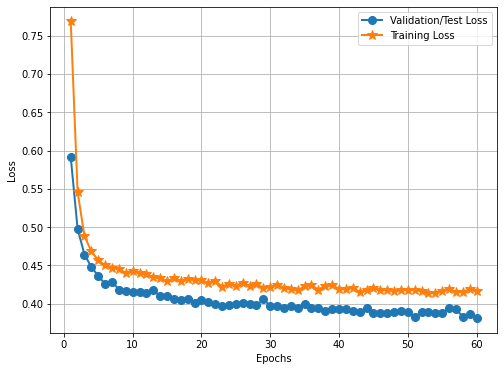

In [51]:
# Plot des loss 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [52]:
# prédictions sur X_test et metriques
predictions = model3.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))

[[2295   73]
 [ 351  281]]


In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2368
           1       0.79      0.44      0.57       632

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



In [54]:
# Split it train set et test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [55]:
# Normalisation data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Optimisation hyperparamètres avec Grid Search et cross validation

In [57]:
# Définition du modèle ANN via une fonction qui sera appelée par KerasClassifier
# par défaut optimiser : adam
# meme structure de modèle que précédemment 
def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 22, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [59]:
# evaluation modèle 
mean = accuracies.mean()
variance = accuracies.std()

In [60]:
print("accuracy moyenne : ", mean)

accuracy moyenne :  0.8505714178085327


In [61]:
print ("variance accuracy : ", variance)

variance accuracy :  0.014094433804890838


In [4]:
# choix des hyperparamètres optimaux avec grid Search
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

classifier = KerasClassifier(build_fn = build_classifier)

# hyperparametres à mettre dans un dictionnaire
parameters = {'batch_size': [16, 32, 64],
              'epochs': [10, 50, 100],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
# entrainement 
grid_search = grid_search.fit(X_train, y_train)
# meilleurs résultats 
best_parameters = grid_search.best_params_
best_mse = grid_search.best_score_

ModuleNotFoundError: No module named 'keras'

In [1]:
# hyperparamètres optimaux
print(best_parameters)

NameError: name 'best_parameters' is not defined

In [26]:
print(best_accuracy)

0.8512857142857143


In [ ]:
# meilleurs hyperparamètres

In [28]:
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [29]:
# Normalisation data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [33]:
from tensorflow.keras.layers import Dropout

modelf = Sequential()
# couches avec nbre de neurones 22, puis 11 puis 11
# ajout Dropout après chaque couche Dense
# Couche d'entrée
modelf.add(Dense(22, activation='relu', input_dim=11))
modelf.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
modelf.add(Dense(11, activation='relu'))
modelf.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
modelf.add(Dense(11, activation = 'relu'))
modelf.add(Dropout(0.3, noise_shape=None, seed=None))

modelf.add(Dense(1, activation='sigmoid'))

modelf.summary()
modelf.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 22)                264       
_________________________________________________________________
dropout (Dropout)            (None, 22)                0         
_________________________________________________________________
dense_365 (Dense)            (None, 11)                253       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_366 (Dense)            (None, 11)                132       
_________________________________________________________________
dropout_2 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_367 (Dense)            (None, 1)               

In [34]:
# avec batch_size optimisé et callbacks 
batch_size = 32
epochs = 100

history = modelf.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    callbacks=[early_stop], 
                    validation_data = (X_test, y_test))

score = modelf.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 2s 224us/sample - loss: 0.6327 - accuracy: 0.6741 - val_loss: 0.4998 - val_accuracy: 0.7893
Epoch 2/100
7000/7000 [==============================] - 1s 108us/sample - loss: 0.5053 - accuracy: 0.7987 - val_loss: 0.4618 - val_accuracy: 0.7893
Epoch 3/100
7000/7000 [==============================] - 1s 110us/sample - loss: 0.4763 - accuracy: 0.7979 - val_loss: 0.4437 - val_accuracy: 0.7897
Epoch 4/100
7000/7000 [==============================] - 1s 105us/sample - loss: 0.4616 - accuracy: 0.8030 - val_loss: 0.4356 - val_accuracy: 0.7903
Epoch 5/100
7000/7000 [==============================] - 1s 99us/sample - loss: 0.4590 - accuracy: 0.8050 - val_loss: 0.4306 - val_accuracy: 0.7977
Epoch 6/100
7000/7000 [==============================] - 1s 127us/sample - loss: 0.4541 - accuracy: 0.8036 - val_loss: 0.4286 - val_accuracy: 0.7963
Epoch 7/100
7000/7000 [==============================] - 1s

Epoch 56/100
7000/7000 [==============================] - 1s 107us/sample - loss: 0.3678 - accuracy: 0.8514 - val_loss: 0.3521 - val_accuracy: 0.8580
Epoch 57/100
7000/7000 [==============================] - 1s 94us/sample - loss: 0.3685 - accuracy: 0.8511 - val_loss: 0.3531 - val_accuracy: 0.8577
Epoch 58/100
7000/7000 [==============================] - 1s 88us/sample - loss: 0.3681 - accuracy: 0.8531 - val_loss: 0.3515 - val_accuracy: 0.8587
Epoch 00058: early stopping
Test loss: 0.3514935156504313
Test accuracy: 0.85866666


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

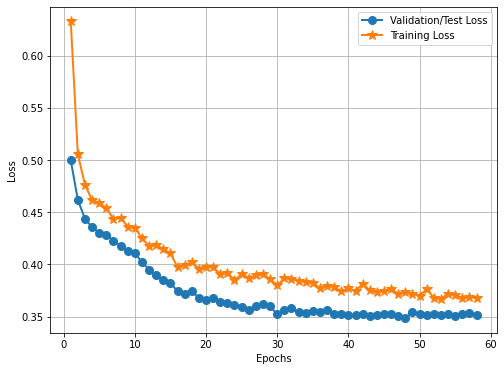

In [37]:
# Plot des loss 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
# prédictions sur X_test et metriques
predictions = modelf.predict(X_test)
predictions = (predictions > 0.5)
print(confusion_matrix(y_test, predictions))

[[2312   56]
 [ 368  264]]


In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2368
           1       0.82      0.42      0.55       632

    accuracy                           0.86      3000
   macro avg       0.84      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000

